##### Libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# ---------------------------------------------------------------------------------------------------------------

# TASK 1

In [139]:
# Loading the data...
df = pd.read_excel("HR_comma_sep.xlsx")
df[:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,4649
1,0.80,0.86,5,262,6,0,1,0,sales,medium,34126
2,0.11,0.88,7,272,4,0,1,0,sales,medium,40522
3,0.72,0.87,5,223,5,0,1,0,sales,low,6916
4,0.37,0.52,2,159,3,0,1,0,sales,low,10928


In [140]:
df.shape

(14999, 11)

In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
salary_num,14999.0,30085.475432,33465.313560,1.00,10334.00,20875.00,38186.50,199768.0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  salary_num             14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


# ---------------------------------------------------------------------------------------------------------------

# TASK 2

In [143]:
# check missing values in data
df[df.isnull().any(axis=1)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num


* ##### As we can observe, there are no points with missing values.

In [144]:
dff = df.copy()
dff

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,4649
1,0.80,0.86,5,262,6,0,1,0,sales,medium,34126
2,0.11,0.88,7,272,4,0,1,0,sales,medium,40522
3,0.72,0.87,5,223,5,0,1,0,sales,low,6916
4,0.37,0.52,2,159,3,0,1,0,sales,low,10928
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,5089
14995,0.37,0.48,2,160,3,0,1,0,support,low,4001
14996,0.37,0.53,2,143,3,0,1,0,support,low,12842
14997,0.11,0.96,6,280,4,0,1,0,support,low,8849


In [145]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [146]:
# Converting the salary attribute to numericals...

# le = preprocessing.LabelEncoder()
# le.fit(df['salary'])
# le.classes_
# vals = le.transform(le.classes_)
# vals

dff = pd.get_dummies(dff,columns=["salary"])
dff = pd.get_dummies(dff,columns=["Department"])

In [147]:
dff

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num,salary_high,...,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,4649,0,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,34126,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,40522,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,6916,0,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,10928,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,5089,0,...,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,4001,0,...,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,12842,0,...,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,8849,0,...,0,0,0,0,0,0,0,0,1,0


In [148]:
df["Department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [149]:
# # Converting the Department attribute to numericals...

# le = preprocessing.LabelEncoder()
# le.fit(df['Department'])
# le.classes_
# vals = le.transform(le.classes_)
# vals

In [150]:
# detect correlations
column_correlation = df.corr()
column_correlation

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.046656
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.022006
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.007598
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.006997
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.047869
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.006091
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.140561
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.091209
salary_num,0.046656,-0.022006,-0.007598,-0.006997,0.047869,0.006091,-0.140561,0.091209,1.000000


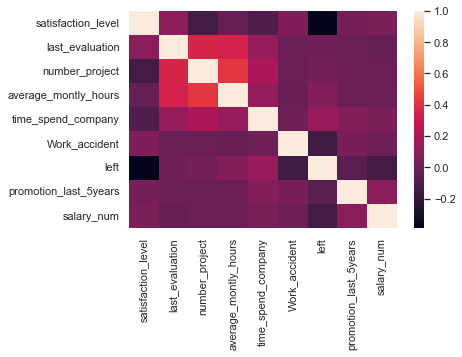

In [151]:
sns.heatmap(column_correlation);

plt.show()

#white background style for seaborn plots
sns.set(style="white")

sns.set(style="whitegrid",
        color_codes=True)

# ---------------------------------------------------------------------------------------------------------------

# TASK 3

In [152]:
X = dff.drop(columns="left",axis=1)
y = dff["left"]

In [153]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'salary_num'],
      dtype='object')

In [154]:
# feature_cols = ['satisfaction_level',
#                 'last_evaluation',
#                 'number_project',
#                 'average_montly_hours',
#                 'time_spend_company', 
#                 'Work_accident', 
#                 'left','promotion_last_5years', 'Department', 'salary', 'salary_num'],

# X = pima[feature_cols] # Features
# y = pima.label # Target variable

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = .3,
                                                    random_state=1)

In [156]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10499, 21), (10499,), (4500, 21), (4500,))

In [157]:
# Creating Decision Tree classifer object...
dtc = DecisionTreeClassifier(max_depth=2)

# Train Decision Tree Classifer...
dtc = dtc.fit(X_train,y_train)

# Predicting the response for test dataset...
y_pred = dtc.predict(X_test)

In [158]:
# TEST Model Accuracy...
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.842


In [172]:
# Creating Decision Tree classifer object...
dtc = DecisionTreeClassifier(max_depth=2)

# Train Decision Tree Classifer...
dtc = dtc.fit(X_test,y_test)

# Predicting the response for test dataset...
y_pred2 = dtc.predict(X_train)

In [176]:
# TRAIN Model Accuracy...
print("Accuracy:",metrics.accuracy_score(y_train, y_pred2))

Accuracy: 0.8533193637489285


# ---------------------------------------------------------------------------------------------------------------

# TASK 4

In [177]:
df["left"].unique()

array([1, 0], dtype=int64)

In [178]:
from sklearn.metrics import confusion_matrix

In [179]:
# confusion matrix

#y_pred = dtc.predict(X_test)

conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[3352,   64],
       [ 647,  437]], dtype=int64)

In [164]:
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score

In [163]:
# print('Accuracy  :', accuracy_score(y_test, y_pred))
# print('Recall    :', recall_score(y_test, y_pred, average='weighted'))
# print('F1-score  :', f1_score(y_test, y_pred, average='weighted'))
# print('Precision :', precision_score(y_test, y_pred))

In [180]:
# Matrix...

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [181]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.842

In [182]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9812646370023419

In [183]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.838209552388097

In [184]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9041132838840189

In [188]:
from sklearn.metrics import roc_curve, roc_auc_score

In [189]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6922005841838278

In [186]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, roc_auc_score

In [187]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      3416
           1       0.87      0.40      0.55      1084

    accuracy                           0.84      4500
   macro avg       0.86      0.69      0.73      4500
weighted avg       0.85      0.84      0.82      4500



* ##### So far the accuracy of our modelis 84% so to we can follow a different approach for like Logistic regression...

# ---------------------------------------------------------------------------------------------------------------

# TASK 5

##### Modelling

In [252]:
from sklearn.tree import DecisionTreeRegressor


In [253]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

dtm.fit(X_test,y_test)   
print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on train dataset=0.8317178289754229
R-Squaredon test dataset=0.8368165271051635


In [190]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'salary_num'],
      dtype='object')

In [195]:
dff

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num,salary_high,...,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,4649,0,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,34126,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,40522,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,6916,0,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,10928,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,5089,0,...,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,4001,0,...,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,12842,0,...,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,8849,0,...,0,0,0,0,0,0,0,0,1,0


In [199]:
list(dfc.columns)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'salary_num',
 'salary_high',
 'salary_low',
 'salary_medium',
 'Department_IT',
 'Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_marketing',
 'Department_product_mng',
 'Department_sales',
 'Department_support',
 'Department_technical']

In [197]:
dfc = dff.copy()

In [ ]:
dff.drop(columns="left",axis=1)

In [226]:
final = dfc.drop(["left",
         "salary_low",
         "salary_medium",
         "salary_high",
         "Department_IT",
         "Department_RandD",
         "Department_accounting",
         "Department_hr",
         "Department_management",
         "Department_marketing",
         "Department_product_mng",
         "Department_sales","Department_support",
         "Department_technical"],axis=1)

In [227]:
final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_num
0,0.38,0.53,2,157,3,0,0,4649
1,0.80,0.86,5,262,6,0,0,34126
2,0.11,0.88,7,272,4,0,0,40522
3,0.72,0.87,5,223,5,0,0,6916
4,0.37,0.52,2,159,3,0,0,10928


In [232]:
feature_cols = final.columns
feature_cols

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary_num'],
      dtype='object')

In [235]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

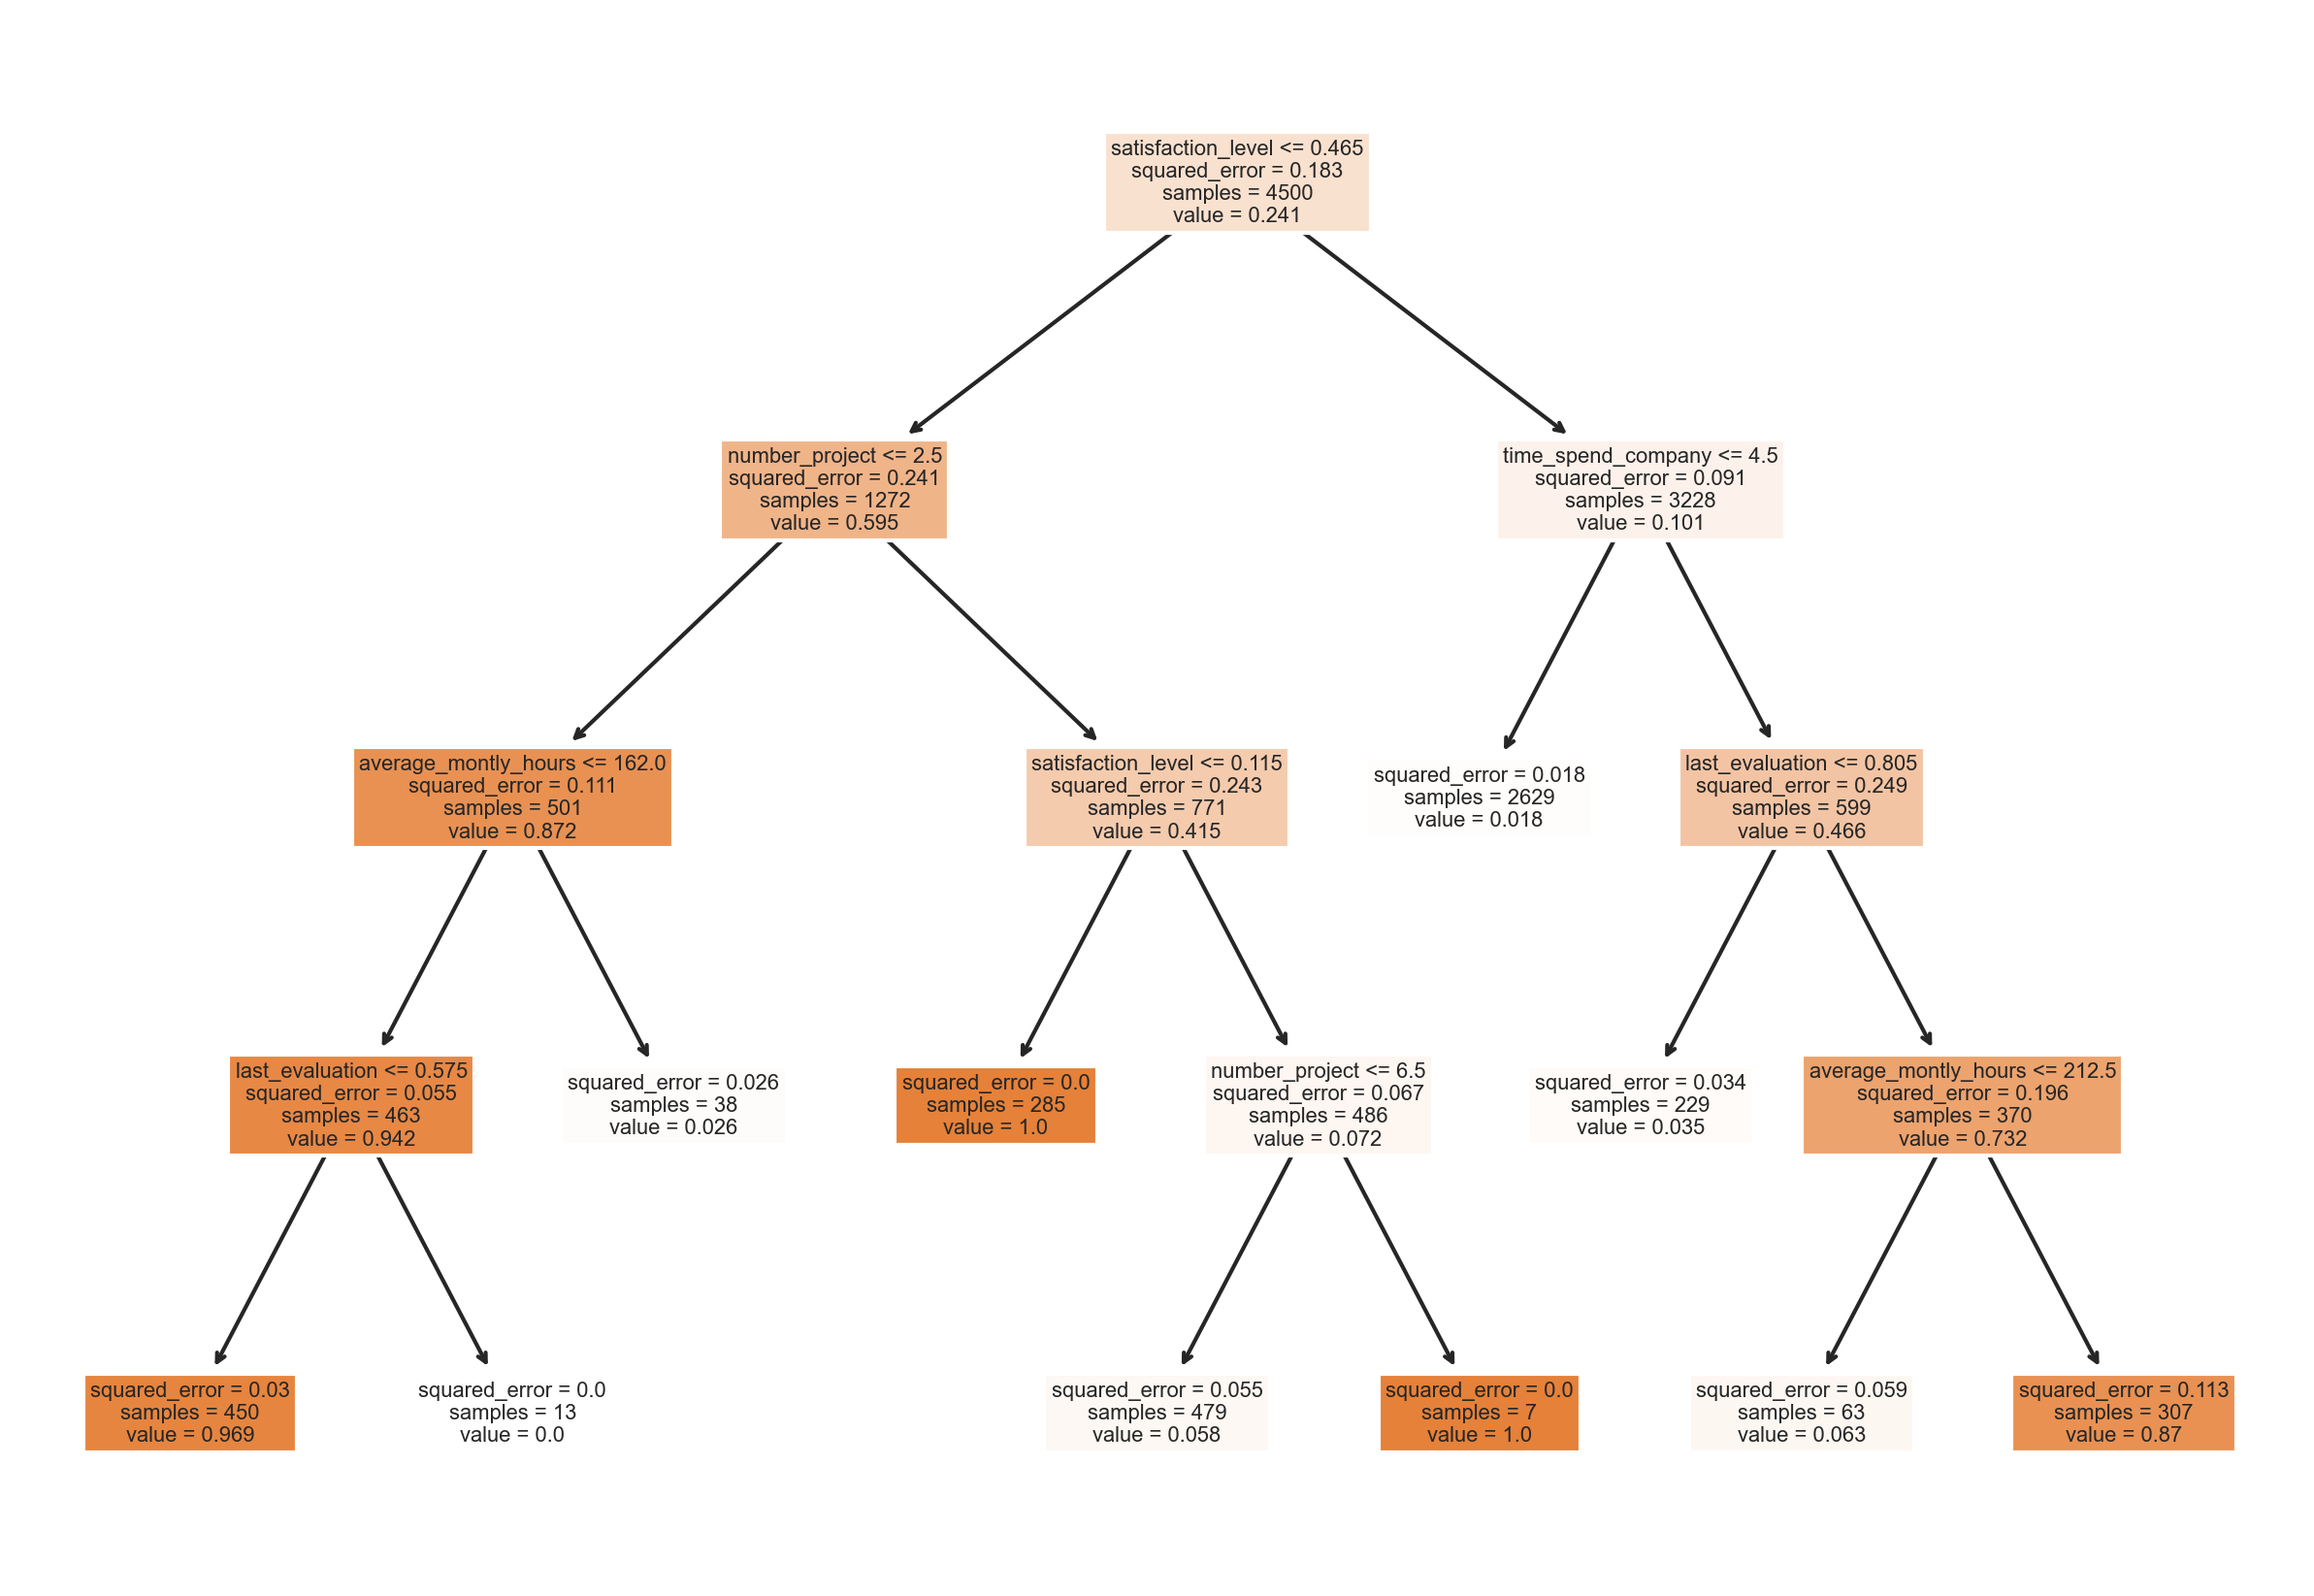

In [254]:

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,7), dpi=300)

tree.plot_tree(dtm,feature_names = feature_cols, filled = True);

#fig.savefig('Diabetes_Tree.png')

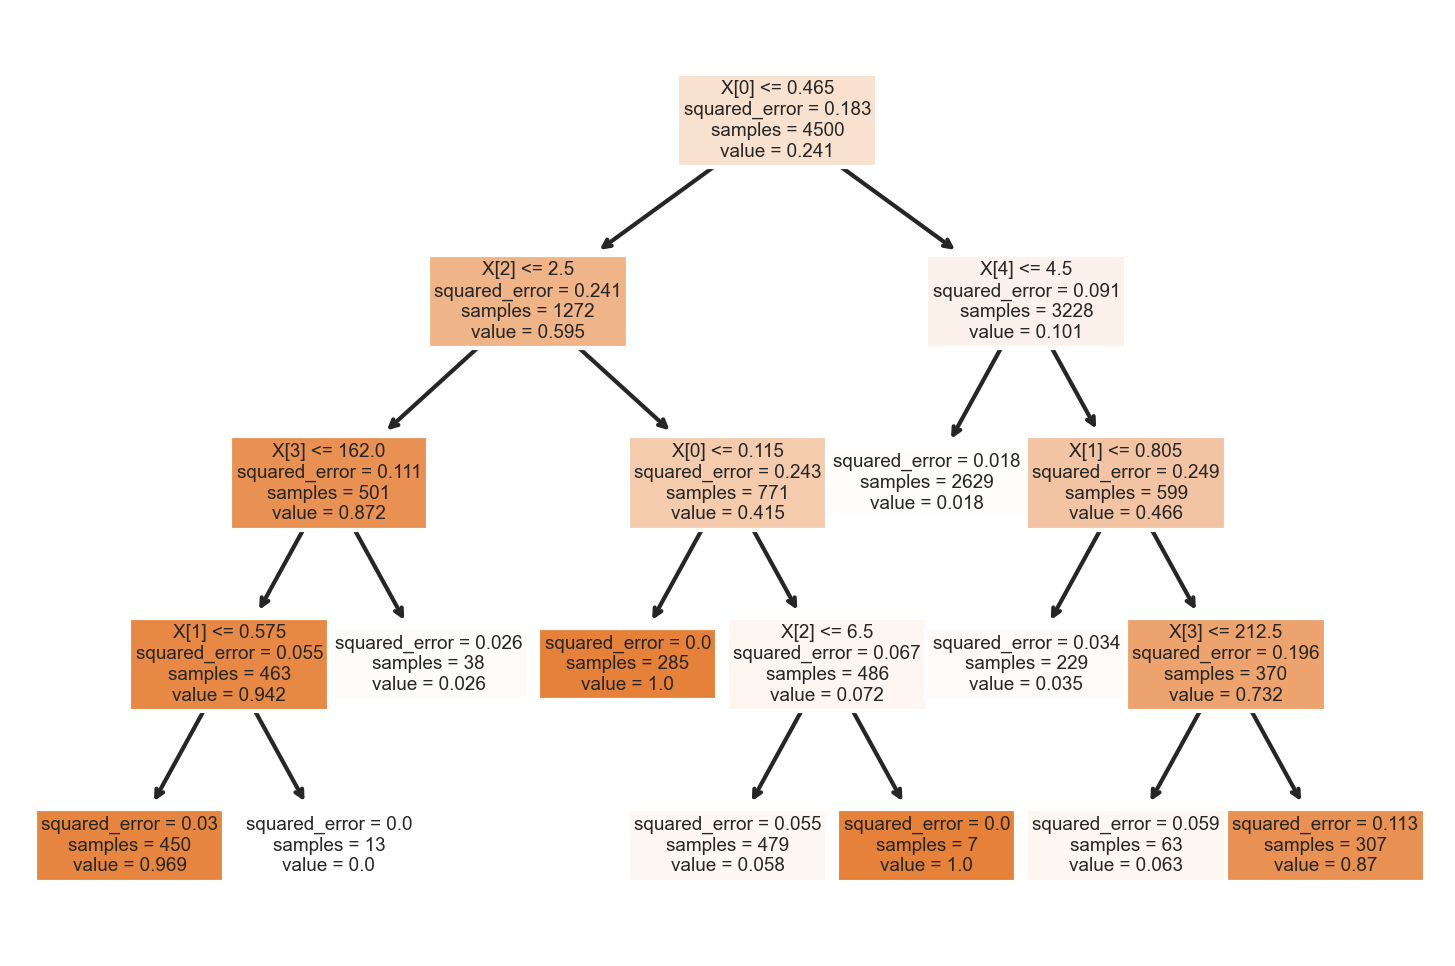

In [255]:
fig, axes = plt.subplots(dpi=300)

tree.plot_tree(dtm,filled = True);

#save figure in current directory as png
fig.savefig('Bike_regression_decisiontree.png')

# ---------------------------------------------------------------------------------------------------------------